#### Open File and use splitlines to ensure we can call different words in our dataset

In [2]:
words = open('names.txt','r').read().splitlines()

In [3]:
# First 10 Words
words[:10]

['emma',
 'olivia',
 'ava',
 'isabella',
 'sophia',
 'charlotte',
 'mia',
 'amelia',
 'harper',
 'evelyn']

#### Learning some things about our dataset. Always an important step

In [4]:
print('Number of words: ',len(words))
print('Minimum word length: ',min(len(word) for word in words))
print('Maximum word length: ',max(len(word) for word in words))

Number of words:  32033
Minimum word length:  2
Maximum word length:  15


In [5]:
# My implementation of splitting words into bigrams

for word in words[:1]: # Print first 10 words
    last_char = None
    for char in list(word): # Print each character in the word, casting to a list makes it an iterable
        if last_char != None:
            print(last_char, char)
        last_char = char
    print()

# Much simpler Karpathy implementation

for word in words[:1]: 
    for ch1, ch2 in zip(word, word[1:]):
        print(ch1, ch2)

e m
m m
m a

e m
m m
m a


In [6]:
b = {} # Dictionary tally of bigrams
for word in words: 
    chars = ['.'] + list(word) + ['.'] # Add SOS and EOS tokens to the word
    for ch1, ch2 in zip(chars, chars[1:]): # Same Karpathy implementation as before
        bigram = (ch1, ch2)
        b[bigram] = b.get(bigram, 0) + 1 # Creates a tally of bigrams, if it doesn't exist, create it and set it to 0, then add 1 for the first word, and if it does add 1 to the current running count.

In [7]:
# Print the first 10 bigrams
for bigram in list(b.keys())[:10]:
    print(bigram, b[bigram])

('.', 'e') 1531
('e', 'm') 769
('m', 'm') 168
('m', 'a') 2590
('a', '.') 6640
('.', 'o') 394
('o', 'l') 619
('l', 'i') 2480
('i', 'v') 269
('v', 'i') 911


In [8]:
sorted(b.items(), key=lambda x: x[1], reverse=True)[:10] # Sorts the dictionary by the value, and returns the top 10 most common bigrams

[(('n', '.'), 6763),
 (('a', '.'), 6640),
 (('a', 'n'), 5438),
 (('.', 'a'), 4410),
 (('e', '.'), 3983),
 (('a', 'r'), 3264),
 (('e', 'l'), 3248),
 (('r', 'i'), 3033),
 (('n', 'a'), 2977),
 (('.', 'k'), 2963)]

In [9]:
chars = sorted(list(set(''.join(words)))) # Sorted list of unique characters
chars = chars + ['.'] # Add SOS and EOS tokens to the list of characters

stoi = {ch: i for i, ch in enumerate(chars)} # Dictionary of characters to ibndex
stoi

{'a': 0,
 'b': 1,
 'c': 2,
 'd': 3,
 'e': 4,
 'f': 5,
 'g': 6,
 'h': 7,
 'i': 8,
 'j': 9,
 'k': 10,
 'l': 11,
 'm': 12,
 'n': 13,
 'o': 14,
 'p': 15,
 'q': 16,
 'r': 17,
 's': 18,
 't': 19,
 'u': 20,
 'v': 21,
 'w': 22,
 'x': 23,
 'y': 24,
 'z': 25,
 '.': 26}

In [10]:
import torch

N = torch.zeros(27, 27, dtype=torch.int32)

for word in words: 
    chars = ['.'] + list(word) + ['.'] # Add SOS and EOS tokens to the word, use same SOS and EOS token because the end of sentence cannot have letters after it and the start of sentence cannot have words before it.
    for ch1, ch2 in zip(chars, chars[1:]): # Same Karpathy implementation as before
        ix1 = stoi[ch1] 
        ix2 = stoi[ch2]
        N[ix1, ix2] += 1

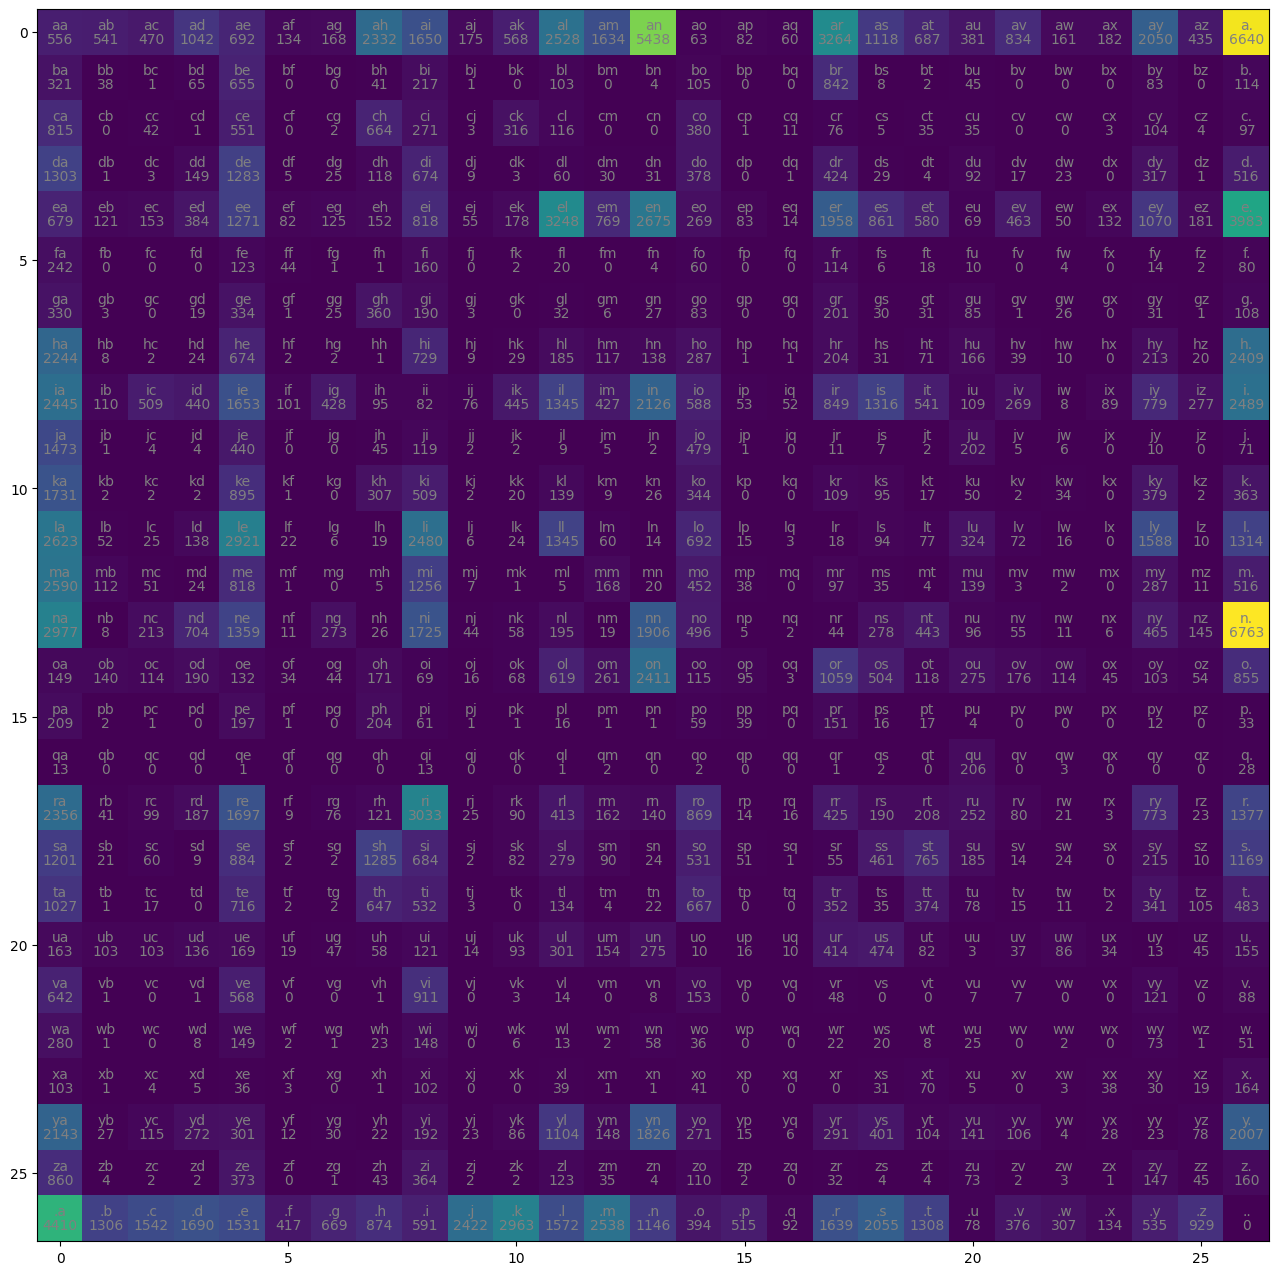

In [11]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

itos = {i: ch for ch, i in stoi.items()} # Dictionary of index to characters

plt.figure(figsize=(16, 16))
plt.imshow(N, cmap='viridis') # Cmap isnt working for some reason.

for i in range(27):
    for j in range(27):
        chstr = itos[i] + itos[j]
        plt.text(j, i, chstr, ha='center', va='bottom', color='gray')
        plt.text(j, i, N[i, j].item(), ha='center', va='top', color='gray')

plt.imshow(N)

In [27]:
def normalize_rows(M):
    return M / M.sum(axis=1, keepdims=True)

def return_normalized_row(letter):
    return normalize_rows(N)[stoi[letter]]

return_normalized_row('c')

tensor([0.2307, 0.0000, 0.0119, 0.0003, 0.1560, 0.0000, 0.0006, 0.1880, 0.0767,
        0.0008, 0.0895, 0.0328, 0.0000, 0.0000, 0.1076, 0.0003, 0.0031, 0.0215,
        0.0014, 0.0099, 0.0099, 0.0000, 0.0000, 0.0008, 0.0294, 0.0011, 0.0275])

In [57]:
def return_index_of_max(letter):
    return int(np.argmax(return_normalized_row(letter)).numpy())

return_index_of_max('l')

4

In [75]:
g = torch.Generator(2147483647)

for i in range(100):
    out = []
    ix = 0
    
    while True:
        row = return_normalized_row(itos[ix]).to('cuda')
        ix = torch.multinomial(row, num_samples=1, replacement=True, generator=g).item()
        out.append(itos[ix])
        if ix == 26:
            break
    print(''.join(out))

ld.
yemio.
marlkana.
ramoiareslalankahayddyel.
nachaiadghaeeerienevan.
.
re.
.
iayacka.
chveenemey.
reymernn.
.
.
miarish.
niey.
xadasadeny.
iolietianechrazaynn.
n.
dheiri.
ntttyel.
nynnnshilare.
lllya.
ymallinaroullee.
ie.
kyn.
.
le.
n.
riavay.
lsazemistynn.
cenoy.
.
.
ya.
manysettera.
in.
ynshiv.
ri.
r.
rlae.
y.
lasastre.
m.
laynaha.
beoue.
laraviairytrtaheylenden.
.
rinelegon.
zizasaah.
.
laky.
riyhelyah.
s.
ee.
n.
pr.
ngtabionde.
dely.
.
ah.
.
kan.
r.
saziceharakelesulia.
.
.
n.
nnn.
chy.
n.
iaamon.
uquropraverolaton.
han.
.
dirihi.
.
.
dabe.
slbrun.
bia.
yliagr.
menavanenemaririayli.
nem.
.
na.
.
mayararil.
i.
rnan.
.
naeinlanransetri.
.
l.
ha.
.
h.
ya.
ineityxtne.
.
n.
